In [1]:
from saris.utils import utils
import os
from saris import sigmap
import math
import numpy as np

2024-09-30 18:11:06.823632: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-30 18:11:06.857780: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-30 18:11:06.857806: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-30 18:11:06.857828: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-30 18:11:06.864287: I tensorflow/core/platform/cpu_feature_g

In [2]:
sionna_config_file = '/home/hieule/research/saris/configs/sionna_L_multi_users.yaml'
sionna_config = utils.load_config(sionna_config_file)

In [3]:
compute_scene_path = "/home/hieule/research/saris/local_assets/blender/hallway_L_0/ceiling_idx/hallway.xml"
viz_scene_path = "/home/hieule/research/saris/local_assets/blender/hallway_L_0/idx/hallway.xml"

sionna_config['cam_look_at'] = [0.0, 0.0, 0.0]
sionna_config['cam_position'] = [0.0, 0.01, 50.0]

ris_pos: [2.0, -3.8, 2.3]
tx_pos: [1.0, 0.0, 2.5]
r: 3.9344631145812006
theta: 1.6216511009091343
phi: -1.313472611823808


Renderer(camera=PerspectiveCamera(aspect=1.31, children=(DirectionalLight(intensity=0.25, position=(0.0, 0.0, …

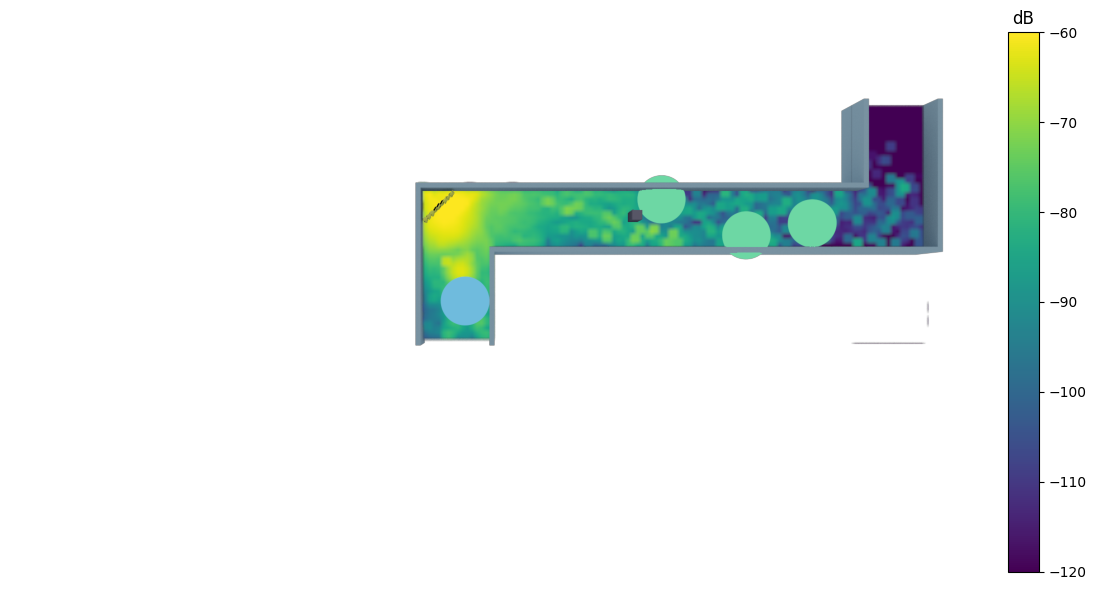

In [7]:
def sign(num):
    return -1 if num < 0 else 1

def compute_rot_angle(
    tile_center: list,
    pt: list
) :
    """Compute the rotation angles for the tile.
    return: (r, theta, phi)
        `r`: distance from the tile center to a point
        `theta`: rotation in y-axis
        `phi`: rotation in z-axis
    """
    x = tile_center[0] - pt[0]
    y = tile_center[1] - pt[1]
    z = tile_center[2] - pt[2]

    r = math.sqrt(x**2 + y**2 + z**2)
    theta = math.acos(z / r)  # rotation in y-axis
    phi = sign(y) * math.acos(x / math.sqrt(x**2 + y**2))  # rotation in z-axis

    return (r, theta, phi)

ris_pos = sionna_config['ris_positions'][0]
tx_pos = sionna_config['tx_positions'][0]

print(f"ris_pos: {ris_pos}")
print(f"tx_pos: {tx_pos}")

r, theta, phi = compute_rot_angle(ris_pos, tx_pos)

print(f"r: {r}")
print(f"theta: {theta}")
print(f"phi: {phi}")

sionna_config['tx_orientations'] = [[phi, math.pi/2 - theta, 0.0]]
sig_cmap = sigmap.engine.SignalCoverageMap(
    sionna_config, compute_scene_path, viz_scene_path
)
coverage_map = sig_cmap.compute_cmap()
scene = sig_cmap.render(coverage_map)
scene.preview(show_orientations=True)

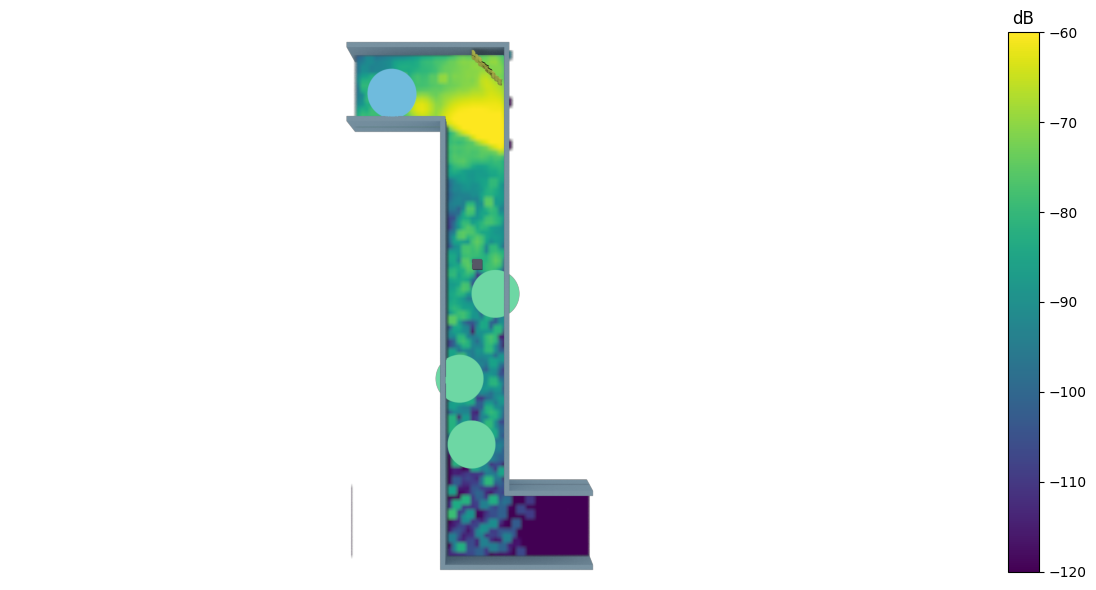

In [7]:
sionna_config['tx_orientations'] = [[-115.0, 0.0, 0.0]]
sig_cmap = sigmap.engine.SignalCoverageMap(
    sionna_config, compute_scene_path, viz_scene_path
)
coverage_map = sig_cmap.compute_cmap()
sig_cmap.render(coverage_map)

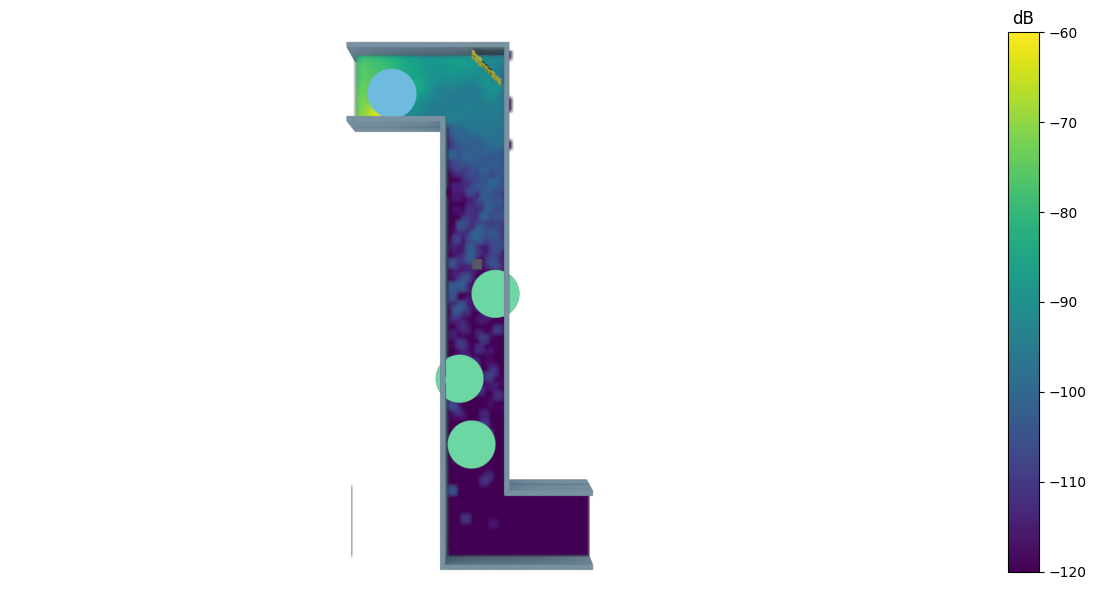

In [8]:
sionna_config['tx_orientations'] = [[-180.0, 0.0, 0.0]]
sig_cmap = sigmap.engine.SignalCoverageMap(
    sionna_config, compute_scene_path, viz_scene_path
)
coverage_map = sig_cmap.compute_cmap()
sig_cmap.render(coverage_map)